### Smart Drone Network (SDN)

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random as random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

-----------

In [3]:
def random_ID(N):
        letters = ["A", "B", "C", "D","E",\
               "F", "G", "H", "I", "J",\
               "K", "L", "M", "N", "O",\
               "P", "Q", "R", "S", "T",\
               "U", "V", "W", "X", "Y", "Z"]
        numbers = [str(i) for i in range(10)]
        ID = ""
        for k in range(N):
            t = random.choice([0,1])
            if t == 0: ID = ID + random.choice(letters)
            else: ID = ID + random.choice(numbers)
        
        return ID

### This is Pokhara!

In [4]:
xc = 28.2096
yc = 83.9856
s = 0.1
dx = 0.001
dy = 0.001
X = np.arange(xc-s,xc+s,dx)
Y = np.arange(yc-s,yc+s,dy)
len(X),len(Y)

(201, 200)

#### Random Position

In [5]:
import random as random

LAT = []
LONG = []
G = nx.Graph()
POS = {}
k = 0
for i in range(30):
    for j in range(30):
        x = random.choice(X)
        y = random.choice(Y)
        LAT.append(x)
        LONG.append(y)
        POS.update({k:[x,y]})
        k = k+1

In [6]:
len(LAT), len(LONG)

(900, 900)

### Generate A random Network

In [7]:
G  = nx.random_geometric_graph(200, radius = 0.025 ,pos=POS, dim=2, p=2, seed=None)

In [8]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 200\nNumber of edges: 897\nAverage degree:   8.9700'

In [9]:
pos = nx.get_node_attributes(G, 'pos')

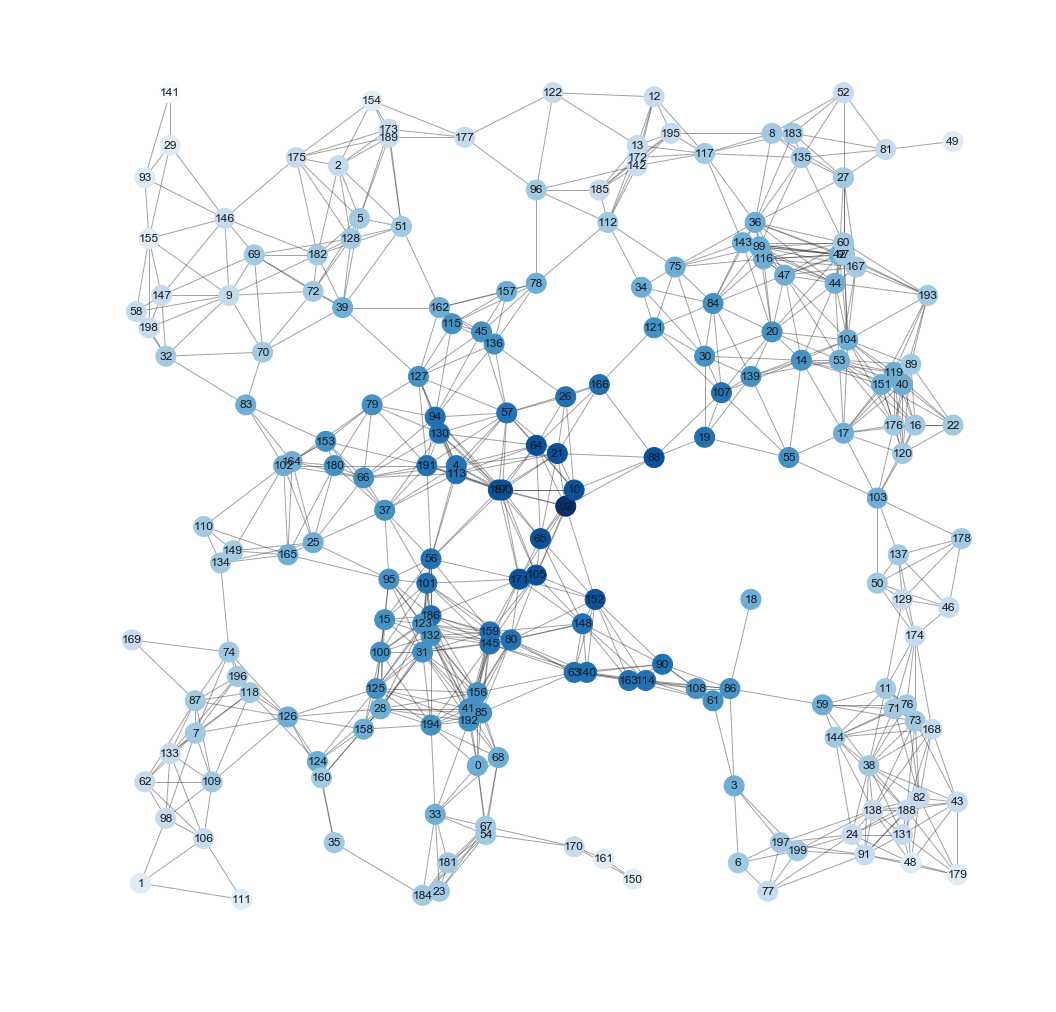

In [10]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))


plt.figure(figsize=(18, 18))
pos = POS
nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)

#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

### Prepare geolocation coordinates

In [11]:
LINE = []
for e in list(G.edges()):
    f = e[0]
    t = e[1]
    LINE.append({"lat":[pos[f][0],pos[t][0]],"long":[pos[f][1],pos[t][1]]})

In [12]:
LAT_node = []
LONG_node = []
for n in list(G.nodes()):
    LAT_node.append(pos[n][0])
    LONG_node.append(pos[n][1])

### Geo Location

In [13]:
# import gmplot package 
import gmplot 
  
gmap3 = gmplot.GoogleMapPlotter(xc,yc, 15) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( LAT_node,LONG_node,'red', size = 100, marker = False ) 
        
# Plot method Draw a line in 
# between given coordinates 

for item in LINE:
    gmap3.plot(item['lat'],item['long'],  
           'cornflowerblue', edge_width = 1.5) 
  

gmap3.draw( "pokhara-lattice.html" ) 

![img](img/pokhara.png)

In [14]:
k = 0
for node in G.nodes():
    print(node,"|",[n for n in G.neighbors(node)])
    k = k+1
    if k>5:
        break

0 | [67, 192, 194, 33, 85, 54, 68, 41, 156]
1 | [98, 111, 106]
2 | [128, 51, 175, 5, 173, 182, 189, 154]
3 | [86, 197, 6, 199, 61]
4 | [66, 94, 127, 187, 57, 190, 37, 56, 130, 113, 21, 64, 191]
5 | [173, 39, 72, 51, 2, 182, 128, 189, 175]


### Minimal Spanning Tree

In [15]:
T=nx.minimum_spanning_tree(G)

In [16]:
print(sorted(T.edges(data=True)))

[(0, 33, {}), (0, 41, {}), (0, 54, {}), (0, 67, {}), (0, 68, {}), (0, 85, {}), (0, 156, {}), (0, 192, {}), (0, 194, {}), (1, 98, {}), (1, 106, {}), (1, 111, {}), (2, 5, {}), (2, 51, {}), (2, 128, {}), (2, 154, {}), (2, 173, {}), (2, 175, {}), (2, 182, {}), (2, 189, {}), (3, 6, {}), (3, 61, {}), (3, 86, {}), (3, 197, {}), (3, 199, {}), (4, 21, {}), (4, 37, {}), (4, 56, {}), (4, 57, {}), (4, 64, {}), (4, 66, {}), (4, 94, {}), (4, 113, {}), (4, 127, {}), (4, 130, {}), (4, 187, {}), (4, 190, {}), (4, 191, {}), (5, 39, {}), (5, 72, {}), (6, 77, {}), (7, 62, {}), (7, 74, {}), (7, 87, {}), (7, 98, {}), (7, 109, {}), (7, 118, {}), (7, 126, {}), (7, 133, {}), (7, 196, {}), (8, 27, {}), (8, 36, {}), (8, 52, {}), (8, 117, {}), (8, 135, {}), (8, 183, {}), (8, 195, {}), (9, 32, {}), (9, 58, {}), (9, 69, {}), (9, 70, {}), (9, 72, {}), (9, 146, {}), (9, 147, {}), (9, 155, {}), (9, 198, {}), (10, 26, {}), (10, 57, {}), (10, 65, {}), (10, 88, {}), (10, 92, {}), (10, 105, {}), (11, 38, {}), (11, 59, {})

(28.089798187972907, 28.328401812027334, 83.864408073747, 84.10579192625397)

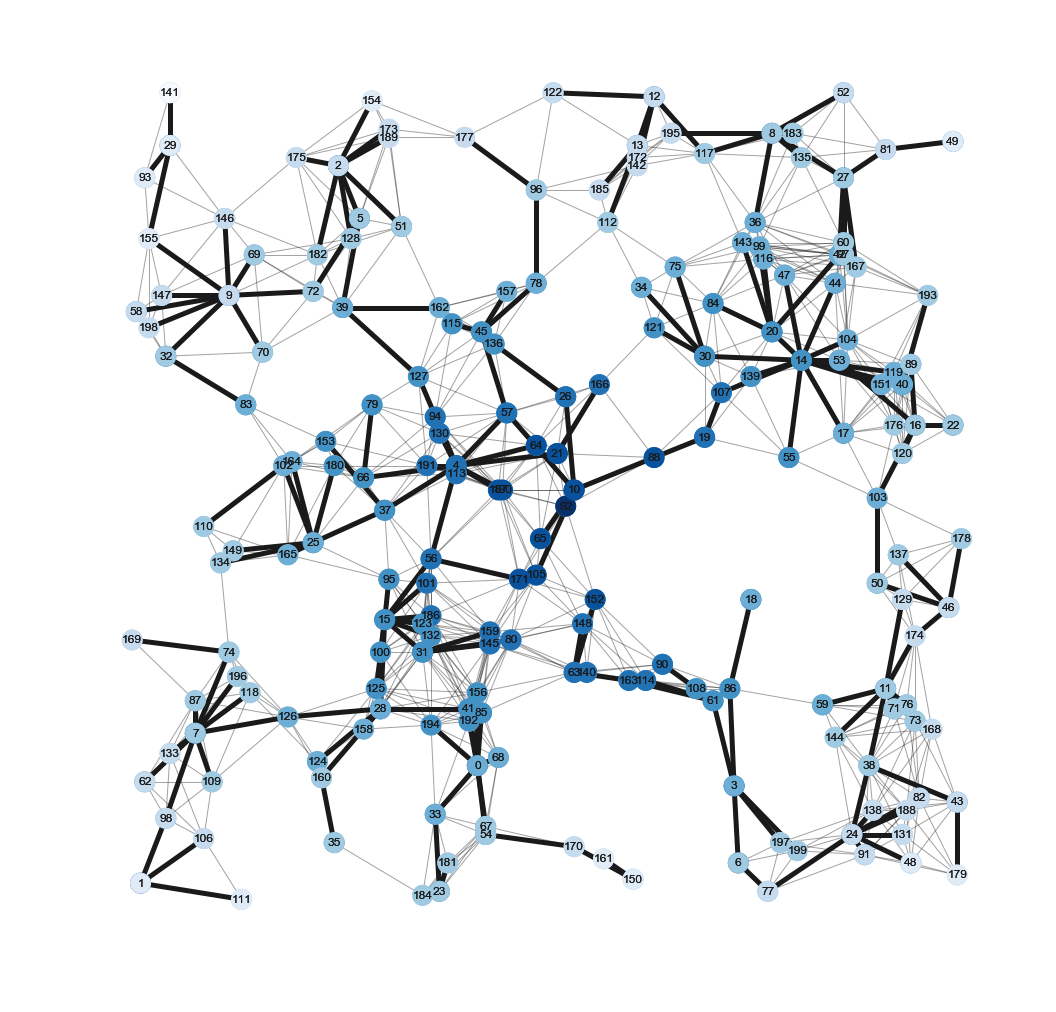

In [17]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(T, pos,\
                       nodelist=[ncenter],\
                       width = 5.0,\
                       alpha=1.0)

nx.draw_networkx_nodes(T, pos,\
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(T,pos,with_labels=True)


'''-----------------------------------------------------'''

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### Defth First Search

In [18]:
DFS = nx.dfs_tree(G,0)

In [19]:
print(sorted(DFS.edges(data=True)))

[(0, 67, {}), (1, 98, {}), (2, 128, {}), (3, 61, {}), (3, 197, {}), (4, 66, {}), (5, 173, {}), (7, 109, {}), (8, 183, {}), (9, 70, {}), (10, 92, {}), (11, 129, {}), (12, 195, {}), (14, 119, {}), (15, 95, {}), (16, 120, {}), (17, 176, {}), (19, 55, {}), (20, 47, {}), (21, 26, {}), (22, 16, {}), (23, 33, {}), (24, 82, {}), (25, 164, {}), (26, 10, {}), (27, 167, {}), (28, 132, {}), (29, 93, {}), (31, 80, {}), (32, 198, {}), (33, 68, {}), (34, 121, {}), (36, 116, {}), (37, 180, {}), (38, 144, {}), (39, 127, {}), (40, 22, {}), (40, 104, {}), (41, 159, {}), (41, 194, {}), (42, 193, {}), (43, 131, {}), (44, 36, {}), (45, 78, {}), (46, 174, {}), (47, 143, {}), (50, 103, {}), (51, 2, {}), (53, 14, {}), (54, 170, {}), (55, 139, {}), (56, 31, {}), (57, 45, {}), (57, 130, {}), (59, 76, {}), (60, 27, {}), (61, 114, {}), (63, 163, {}), (64, 190, {}), (65, 105, {}), (66, 37, {}), (67, 181, {}), (68, 54, {}), (68, 192, {}), (70, 39, {}), (71, 59, {}), (72, 5, {}), (73, 38, {}), (74, 196, {}), (75, 99,

(28.089914999999973, 28.328285000000264, 83.86470499999992, 84.10549500000106)

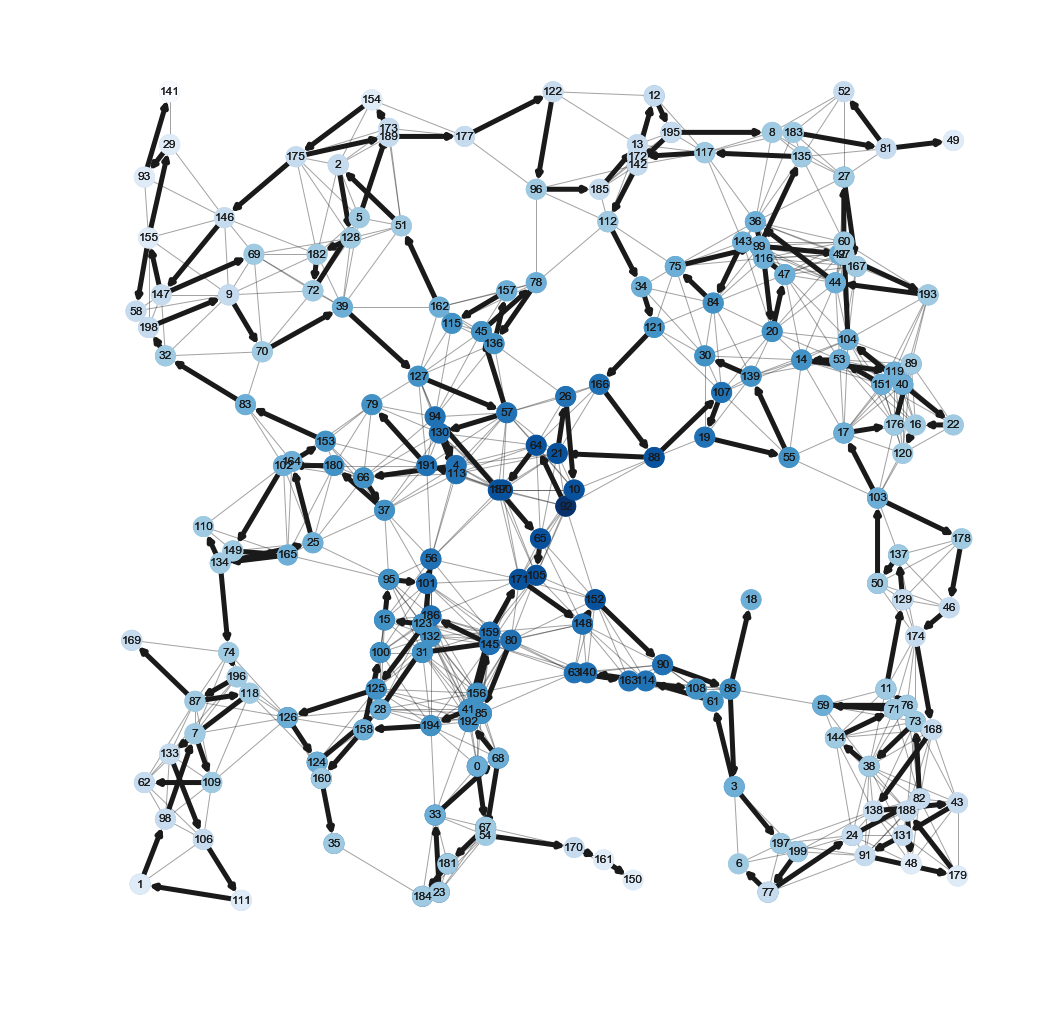

In [20]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(DFS, pos,\
                       nodelist=[ncenter],\
                       width = 5.0,\
                       alpha=1.0)

nx.draw_networkx_nodes(DFS, pos,\
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(DFS,pos,with_labels=True)


'''-----------------------------------------------------'''

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

### Breadth First Searh

In [21]:
BFS = nx.bfs_tree(G,0)

(28.089914999999973, 28.328285000000264, 83.86470499999992, 84.10549500000106)

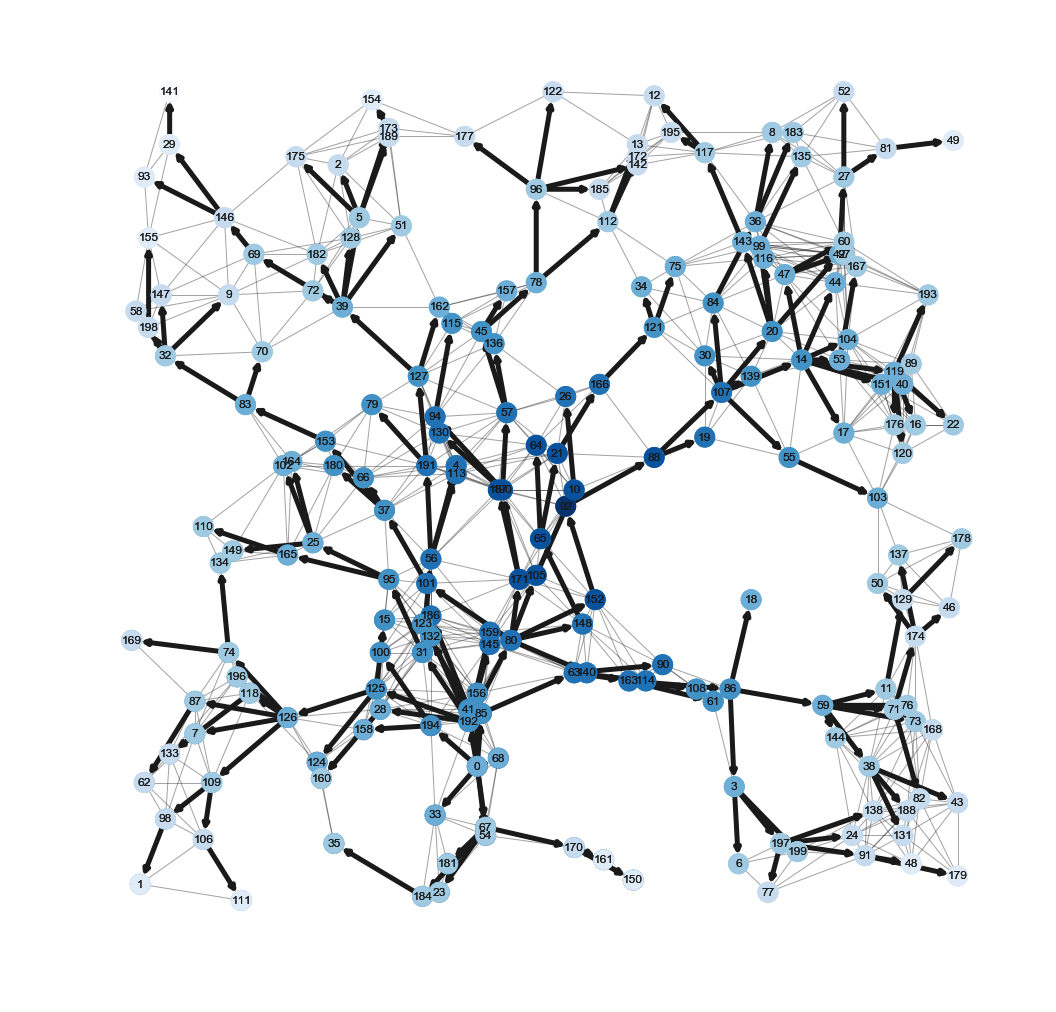

In [22]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d


plt.figure(figsize=(18, 18))
pos = POS





nx.draw_networkx_edges(BFS, pos,\
                       nodelist=[ncenter],\
                       width = 5.0,\
                       alpha=1.0)

nx.draw_networkx_nodes(BFS, pos,\
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(BFS,pos,with_labels=True)


'''-----------------------------------------------------'''

nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)




#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')

#### Shortest Path